<h2 align="center"> Sentiment Analysis in Banking and Financial Services<h2>
<h3 align="center"> Natural Language Processing <h3>

In [25]:
#Import required Libraries
import pandas as pd

#Libraies to clean the data
import nltk
from nltk.corpus import stopwords

#library for data Visualization
import wordcloud
import matplotlib.pyplot as plt

#library and function for tokanization and vectorization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

<h3 align='center'>1. Corpus <h3>

In [3]:
#Import our datset into our Jupyter Notebook

data = pd.read_csv('dataset/all-data.csv',encoding='iso-8859-1')


In [4]:
#Print how our dataset looks like: The dataset has two columns, which are sentiments and the news.
data.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [6]:
#rename the columns of your dataframe
data.columns=["sentiment", "news"]
data.head()

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [7]:
#Printing the first 5 news of our dataset

for news in data['news'].iloc[0:5]:
    print("\n",news)


 Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .

 The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .

 With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .

 According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .

 FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed ci

<h3 align="center"> 2. Cleaning and Segmentation <h3>

In [9]:
#Turn all Uppercase words into lowercase and remove special character and digits.

#1. Turn all UpperCase and Capitalized word into lowecase.
data['news'] = data['news'].apply(lambda word:' '.join(word.lower() for word in word.split()))

#2. Remove any digits/numbers and special character
data['news'] = data['news'].str.replace('\d+',' ',regex=True)

#3. Remove special characters
data['news'] = data['news'].str.replace('\W',' ',regex=True)

#print the dataset after the clean.
data.head()

,sentiment,news
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company s updated strategy f...
4,positive,financing of aspocomp s growth aspocomp is ag...


In [11]:
#Remove StopWords: To remove stopword you use the Library nltk, in particular you will need to import nltk.corpus.

stopwords_list = set(stopwords.words('english'))
data['news'] = data['news'].apply(lambda word: ' '.join([word for word in word.split() if word not in stopwords_list]))

#printing dataset
data.head()

,sentiment,news
0,neutral,technopolis plans develop stages area less squ...
1,negative,international electronic industry company elco...
2,positive,new production plant company would increase ca...
3,positive,according company updated strategy years baswa...
4,positive,financing aspocomp growth aspocomp aggressivel...


In [12]:
#Printing the first 5 news of our dataset

for news in data['news'].iloc[0:5]:
    print("\n",news)


 technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said

 international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported

 new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability

 according company updated strategy years basware targets long term net sales growth range operating profit margin net sales

 financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs


technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability according company updated strategy years basware targets long term net sales growth range operating profit margin net sales financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs last quarter componenta net sales doubled eur eur period year earlier moved zero pre tax profit pre tax loss eur third quarter net sales increased eur mn operating profit eur mn operating profit rose eur mn eur mn corresponding period representi

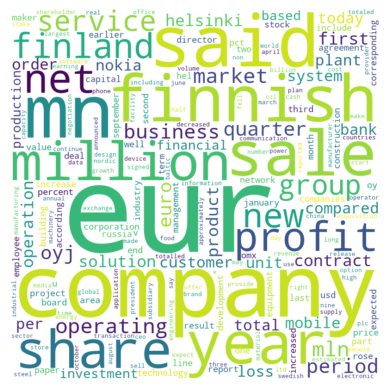

In [24]:
#Create a cloud of words upon their frequency: We will use two libraries wordcloud and matplotlib.

common_words=''

for i in data.news:
    i = str(i)
    word = i.split()
    common_words += " ".join(word)+" "
print(common_words)   


wordcloud = wordcloud.WordCloud(width = 800, height = 800, background_color='white', min_font_size=10, collocations=False).generate(common_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




<h3 align="center">3-4. Tokanization and Vectorization<h3>

In [29]:
#Let breakdown each news into words: We will need to import Tokanizer library and keras.
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data['news'].values)
X = tokenizer.texts_to_sequences(data['news'].values)  

#print the news tokes-vectors.
print("number of rows:{}\nnumber of columns: {}".format(len(X),len(X[0])))
X[0:5]

number of rows:4845
number of columns: 7


[[240, 114, 450, 65, 45, 451, 4],
 [192, 79, 2, 229, 94, 181, 82, 2, 169, 156],
 [15, 39, 49, 2, 72, 60, 170, 87, 60, 362, 72, 129, 404, 60, 39],
 [44, 2, 241, 162, 199, 134, 174, 8, 6, 118, 263, 13, 9, 390, 8, 6],
 [430, 118, 430, 118, 241]]

In [30]:
#The length of our tokenized data are not even, lets set each text with the same length.
X = pad_sequences(X)

#print the news tokes-vectors.
print("number of rows:{}\nnumber of columns: {}".format(len(X),len(X[0])))
X[0:5]

number of rows:4845
number of columns: 31


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240, 114,
        450,  65,  45, 451,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 192,  79,   2, 229,  94,
        181,  82,   2, 169, 156],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  15,  39,  49,   2,  72,  60, 170,  87,  60, 362,
         72, 129, 404,  60,  39],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  44,   2, 241, 162, 199, 134, 174,   8,   6, 118, 263,
         13,   9, 390,   8,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        430, 118, 430, 118, 241]], dtype=int32)